In [176]:
%pylab inline
import pandas as pd
from jupyterthemes import jtplot

jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [177]:
layer_scores = pd.read_csv('output/2019-layer-scores.csv')

# Normalize columns
First, let's normalize all of the statistics in the dataset.

We want to make the range of all variables 0-100. It'll make it easier to do a radar plot.

First, we'll look at the distribution of one metric.

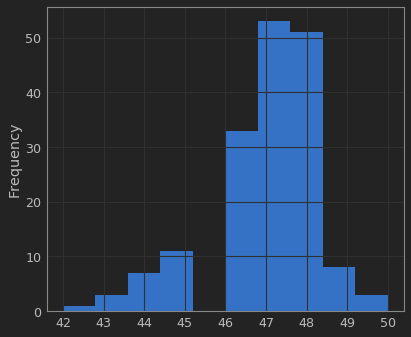

In [178]:
layer_scores['layer4-alexa-rankings'].plot.hist()

When we normalize it, we should see the same distribution.

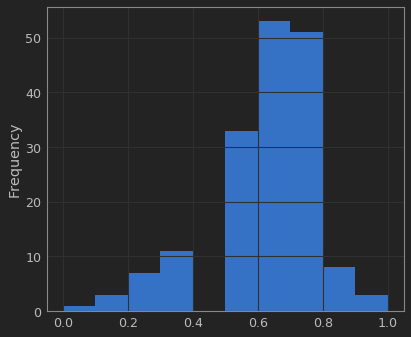

In [179]:
def normalize (df: pd.DataFrame) -> pd.DataFrame:
    '''Convert to values 0 to 1.'''
    return (df - df.min()) / (df.max() - df.min())


normalize(layer_scores['layer4-alexa-rankings']).plot.hist()

One more issue here is that network interference events are power-law distributed.

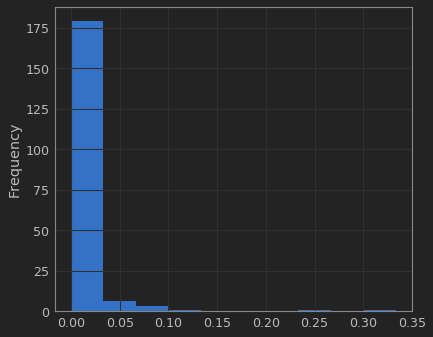

In [194]:
layer_scores['layer3-network-interference-rate'].plot.hist()

That means that most countries won't be very much fun to look at! We can fix this by taking the log.

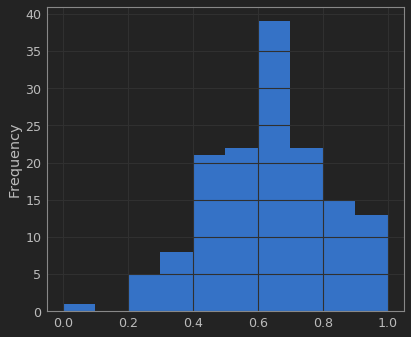

In [204]:
def log (df: pd.DataFrame) -> pd.DataFrame:
    return np.log(df) - np.log(df.shift(1))

normalize(log(layer_scores['layer3-network-interference-rate']))
.plot.hist()

# test.plot.hist()

# Simplify dataset

That looks right. Let's perform this mapping for all of our metrics to produce a simplified dataset.

In [252]:
data = pd.DataFrame({
    'Country': layer_scores['Country'],
    'Alpha-2 code': layer_scores['Alpha-2 code'],
    'layer2 (ipv6)': normalize(layer_scores['layer2-ipv6-adoption']),
    'layer3 (network interference)': normalize(log(layer_scores['layer3-network-interference-rate'])).fillna(value=0),
    'layer4 (popular website locality)':  normalize(layer_scores['layer4-alexa-rankings']),
    'layer5 (cross border laws)': layer_scores['layer5-has-cross-border-laws?']
})
data.head()

,Country,Alpha-2 code,layer2 (ipv6),layer3 (network interference),layer4 (popular website locality),layer5 (cross border laws)
0,Afghanistan,AF,0.001111,0.000000,0.625,0.0
1,Albania,AL,0.000000,0.616163,0.500,0.0
2,Algeria,DZ,0.000000,0.395624,0.750,0.0
3,American Samoa,AS,0.000000,0.000000,NaN,0.0
4,Andorra,AD,0.000000,0.000000,NaN,0.0


# Produce radar plots

Now we'll want to produce radar plots for each country (or for sets of countries).

In [253]:
def find_country (alpha2: str) -> pd.DataFrame:
    return data[data['Alpha-2 code']==alpha2]

find_country('CN')

,Country,Alpha-2 code,layer2 (ipv6),layer3 (network interference),layer4 (popular website locality),layer5 (cross border laws)
45,China,CN,0.025366,0.670428,1.0,1.0


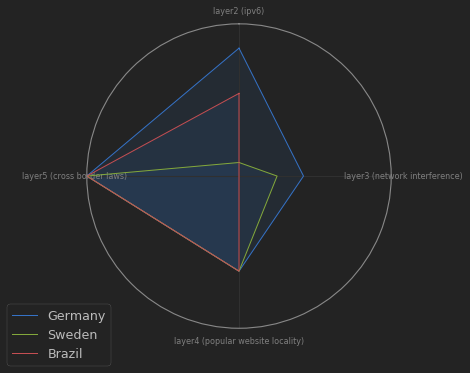

In [254]:
# number of variable
def radar_plot (df):
    
    non_numeric_cols = ['Country','Alpha-2 code']
    
    categories=list(df.drop(columns=non_numeric_cols))
    N = len(categories)
     
#     # We are going to plot the first line of the data frame.
#     # But we need to repeat the first value to close the circular graph:
# #     values=df.loc[0].drop(columns=['Country','Alpha-2 code']).values.flatten().tolist()
#     values= df.values.flatten().tolist()
#     values += values[:1]
# #     values
     
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,1)
     
#     # Plot data
#     ax.plot(angles, values, linewidth=1, linestyle='solid')
     
#     # Fill area
#     ax.fill(angles, values, 'b', alpha=0.1)
    for i in range(len(df)):
        values=df.iloc[i].drop(non_numeric_cols).values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.iloc[i]['Country'])
        ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    
    
radar_plot(
    find_country('DE')\
        .append(find_country('SE'))\
        .append(find_country('BR'))
)

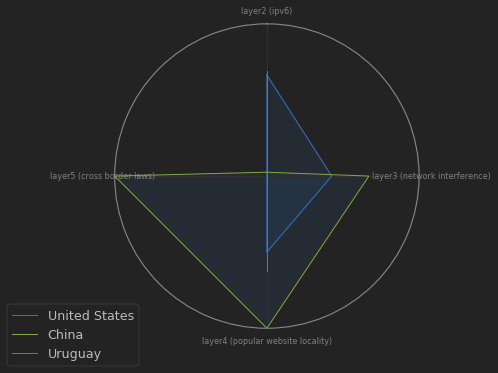

In [255]:
radar_plot(
    find_country('US')\
        .append(find_country('CN'))\
        .append(find_country('UY'))
)

In [243]:
find_country('UY')

,Country,Alpha-2 code,layer2 (ipv6),layer3 (network interference),layer4 (popular website locality),layer5 (cross border laws)
243,Uruguay,UY,0.689687,NaN,0.625,0.0
